# Benefit of Multiplicative Models of Systems

Testing actuator selection and feedback of MPL models on simulations of True system
- Comparison to Nominal Model
- Comparison of MPL models

##### Py Packages

In [1]:
import numpy as np
from copy import deepcopy as dc
import pandas as pd
# %matplotlib widget

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import simulation_model_comparison, plot_simulation_comparison1, plot_simulation_comparison2, actuator_comparison, cost_comparison_print

## Code

In [2]:
test_set = 'System Model 7'
S_True = sys_from_file(test_set + ' C')
S_True['label'] = 'True System'
S_MPL = sys_from_file(test_set + ' B')
S_MPL['label'] = 'Multiplicative Model'
S_Nom = sys_from_file(test_set + ' A')
S_Nom['label'] = 'Nominal Model'

System read from file @ system_model/System Model 7 C.pickle 

System read from file @ system_model/System Model 7 B.pickle 

System read from file @ system_model/System Model 7 A.pickle 



In [3]:
ret_sim = simulation_model_comparison(S_Nom, S_MPL, S_True)
ret_sim['file_name'] = test_set

Simulation start: Comparison of actuator selection of A vs B on C
====> Breaking current simulation at t= 48 as cumulative cost magnitude exceed 1e+08
====> Breaking current simulation at t= 56 as cumulative cost magnitude exceed 1e+08
====> Breaking current simulation at t= 59 as cumulative cost magnitude exceed 1e+08
====> Breaking current simulation at t= 98 as cumulative cost magnitude exceed 1e+08
Simulation end: Comparison of actuator selection of A vs B on C


## Output

#### System Models

##### System C - True System

max(abs(eigvals(A)))= 0.8000
Image save @ images/System Model 7_True System.pdf


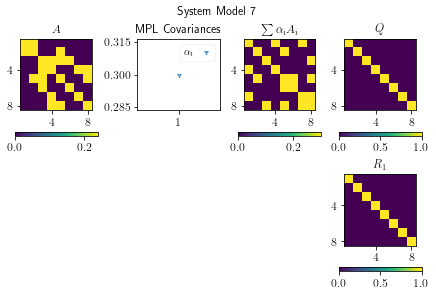

In [4]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(S_True['A'])))))
system_display_matrix(S_True, test_set)

##### System A

max(abs(eigvals(A)))= 0.8000
Image save @ images/System Model 7_Nominal Model.pdf


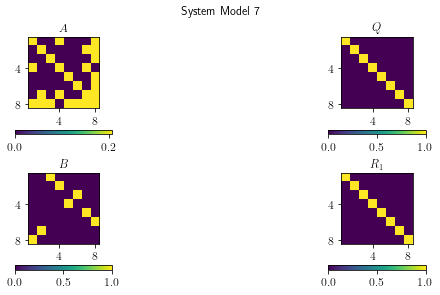

In [5]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_A']['A'])))))
system_display_matrix(ret_sim['system_A'], test_set)

##### System B

max(abs(eigvals(A)))= 0.8000
Image save @ images/System Model 7_Multiplicative Model.pdf


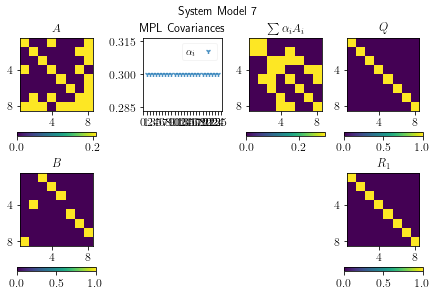

In [6]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_B']['A'])))))
system_display_matrix(ret_sim['system_B'], test_set)

#### Simulation - Trajectory, Control Input and Costs

Plot saved as images/System Model 7_comparison1.pdf


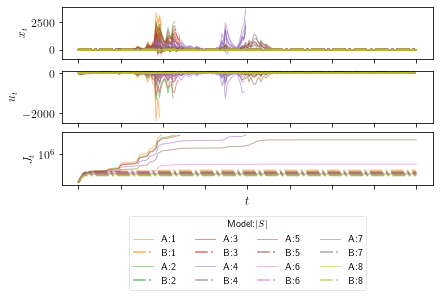

In [7]:
plot_simulation_comparison1(ret_sim)

#### Actuator set comparison

Control sets are different


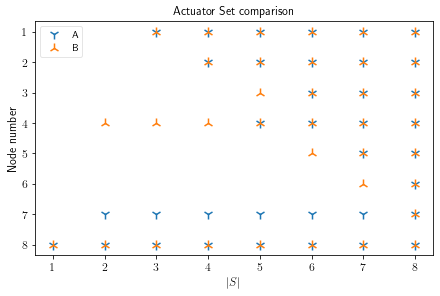

Plot saved as images/System Model 7_actcomparison.pdf


<Figure size 432x288 with 0 Axes>

In [8]:
actuator_comparison(ret_sim, disptext=True, figplt=True);

#### Simulated costs

In [9]:
# cost_comparison_print(ret_sim)

In [13]:
values = dc(ret_sim)

data_cols = ["A", "B", "A-B", "(A-B)/A x100"]
data_rows = []

for key in values['T_A']['costs']:
    data_rows.append(key)
cost_data = np.zeros([len(data_rows), len(data_cols)])

for i in range(0, len(data_rows)):
    cost_data[i, 0] = round(values['T_A']['costs'][str(i + 1)][-1], 2)
    cost_data[i, 1] = round(values['T_B']['costs'][str(i + 1)][-1], 2)
    cost_data[i, 2] = round(cost_data[i, 0] - cost_data[i, 1], 2)
    cost_data[i, 3] = round((cost_data[i, 0] - cost_data[i, 1])*100 / cost_data[i, 0], 0)

formatmap = {}
for i in data_cols:
    formatmap[i] = '{:.2e}'
formatmap[data_cols[-1]] = '{:0.0f}%'

# print(cost_data)
    
cost_table = pd.DataFrame(cost_data, data_rows, data_cols)
cost_table = cost_table.style.format(formatmap, precision=2, na_rep='-')
# s1 = cost_table.style.format(formatter='{:0.2e}', na_rep='NA', precision=2)
# s = cost_table.style.format('{:0.0f}', na_rep='NA', precision=2, subset=[3])
# s.to_latex()
cost_table
cost_table.to_latex()

'\\begin{tabular}{lrrrr}\n{} & {A} & {B} & {A-B} & {(A-B)/A x100} \\\\\n1 & - & 1.60e+04 & - & - \\\\\n2 & - & 1.04e+04 & - & - \\\\\n3 & - & 9.51e+03 & - & - \\\\\n4 & - & 7.94e+03 & - & - \\\\\n5 & 3.44e+07 & 6.74e+03 & 3.44e+07 & 100% \\\\\n6 & 7.89e+04 & 5.58e+03 & 7.33e+04 & 93% \\\\\n7 & 7.07e+03 & 5.11e+03 & 1.96e+03 & 28% \\\\\n8 & 6.48e+03 & 4.66e+03 & 1.83e+03 & 28% \\\\\n\\end{tabular}\n'

Plot saved as images/System Model 7_comparison2.pdf


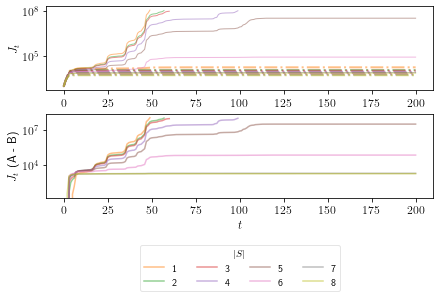

In [11]:
plot_simulation_comparison2(ret_sim)

## Run Complete

In [12]:
print('Run Complete')

Run Complete
